# This notebook aims to execute automated methodological steps for research reproduction purposes. For this, the computational routine main code was divided into two parts, the first containing the "semantic search" and the next part containing the cosine similarity.

---



# FIRST STEP - SEMANTIC SEARCH

________________________________________________________________________________

 To start, we will need to install and import OpenAI and input an API Key. To do that, we will need to login in https://openai.com/ and go to "View API Keys" to generate a key to input. After, wee need to install all dependencies and the correct version of the packages as showing below.

In [1]:
!pip install nltk
!pip install pandas
!pip install openai
!pip install scipy


In [2]:
import nltk
from typing import List, Tuple
import pandas as pd
import scipy
import numpy as np
from openai import OpenAI
import openai

import ast
from scipy import spatial

import os

#Insert your API key
OPENAI_API_KEY = 'OPENAI KEY HERE'
EMBEDDING_SM_MODEL= 'text-embedding-ada-002'
GPT_BOOT_MODEL = 'gpt-4.0'



Let's start with a simple .csv file that contains the definitions of geographical classes. After creating the file, or download, upload it to Google Colab files. Once the file is uploaded, read it into a pandas data frame.

In [4]:
df = pd.read_csv('word_box_01.csv')
print(df)

                                                  TEXT
0    Todas as terras que nao sao classificadas como...
1    Campo e uma forma particular de ocorrencia (no...
2    Entende como areas campestres as diferentes ca...
3    Areas de relevo plano ou suave ondulado recobe...
4    Areas abertas cobertas por gramineas homogenea...
..                                                 ...
115  Estas areas referem se tanto a ambientes natur...
116  Os afloramentos rochosos sao aquelas areas que...
117  Area destinada ao pastoreio do gado formada me...
118  os cultivos em sistemas agroflorestais sao uma...
119  Nas escalas regional e exploratoria nao e faci...

[120 rows x 1 columns]


Transform the data into Embenddinigs and save the vector coordinates into a "word_embeddings.csv" file, showed as a output with respectives embenddings.

In [5]:
def TokenizeLargerlists(text):
  nltk.download('punkt')
  sentences= nltk.sent_tokenize(text)
  return sentences


In [6]:
# Defina as variáveis globais como a chave da API e o modelo de embeddings
#Insert your API key
OPENAI_API_KEY = ' '
EMBEDDING_SM_MODEL = 'text-embedding-ada-002'
import nltk
from typing import List, Tuple
import pandas as pd
import scipy
from openai import OpenAI
import openai
import ast
from scipy import spatial
import os
GPT_BOOT_MODEL = 'gpt-4.0'
!pip install --upgrade openai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 389.6/389.6 kB 8.5 MB/s eta 0:00:00
  Attempting uninstall: openai
    Found existing installation: openai 1.54.3
    Uninstalling openai-1.54.3:
      Successfully uninstalled openai-1.54.3


In [7]:
# Inicializa o cliente OpenAI ENTER OUR OPENAI KEY
client = OpenAI(api_key='OPENAI KEY HERE')

def createAndSaveEmbeddings(input_csv):
    """
    Cria embeddings para os textos de um arquivo CSV e os salva em outro arquivo CSV.

    Args:
        input_csv (str): Caminho para o arquivo CSV de entrada com textos.
    """
    # Ler o arquivo CSV de entrada

    sentences = df.iloc[:, 0].tolist()  # Assumindo que os textos estão na primeira coluna

    BATCH_SIZE = 1000  # Defina o tamanho do lote para processar os textos

    embeddings = []  # Lista para armazenar os embeddings

    # Processa os textos em lotes
    for batch_start in range(0, len(sentences), BATCH_SIZE):
        batch_end = batch_start + BATCH_SIZE
        batch = sentences[batch_start:batch_end]  # Extrai um lote de textos
        print(f"Processando lote {batch_start} a {batch_end-1}")

        # Obtém os embeddings para o lote de textos usando o novo método client.embeddings.create()
        response = client.embeddings.create(input=batch, model=EMBEDDING_SM_MODEL)

        # Adiciona os embeddings à lista
        batch_embeddings = [e.embedding for e in response.data] # Adjusted to access the embedding attribute
        embeddings.extend(batch_embeddings)

    # Cria um DataFrame a partir dos textos e embeddings
    df_embeddings = pd.DataFrame({"embedding": embeddings})

    # Salva o DataFrame em um arquivo CSV
    df_embeddings.to_csv("saved_embeddings.csv", index=False)

In [8]:
df['embedding'] = df['TEXT'].apply(lambda x: client.embeddings.create(input=[x], model='text-embedding-ada-002').data[0].embedding)
df.to_csv('word_embeddings.csv', index=False)

In [9]:
df = pd.read_csv('word_embeddings.csv')
df['embedding'] = df['embedding'].apply(eval).apply(np.array)
df

,TEXT,embedding
0,Todas as terras que nao sao classificadas como...,"[0.004218412563204765, 0.0023728571832180023, ..."
1,Campo e uma forma particular de ocorrencia (no...,"[0.011420016176998615, -0.0010389176895841956,..."
2,Entende como areas campestres as diferentes ca...,"[0.006460430100560188, 0.008781543001532555, 0..."
3,Areas de relevo plano ou suave ondulado recobe...,"[-0.004660353530198336, -0.006186163052916527,..."
4,Areas abertas cobertas por gramineas homogenea...,"[0.0007859538309276104, -0.0014895736239850521..."
...,...,...
115,Estas areas referem se tanto a ambientes natur...,"[0.008503569290041924, -0.006246927194297314, ..."
116,Os afloramentos rochosos sao aquelas areas que...,"[-0.0036075308453291655, -0.007860054261982441..."
117,Area destinada ao pastoreio do gado formada me...,"[0.011677813716232777, -0.00299268402159214, -..."
118,os cultivos em sistemas agroflorestais sao uma...,"[-0.018634872511029243, -0.0022275829687714577..."


In [10]:
import torch
from torch import cosine_similarity

In [11]:
search_term = input('Enter a search term: ')

Enter a search term: floresta


In [12]:
search_term_vector = client.embeddings.create(input=search_term, model=EMBEDDING_SM_MODEL)
search_term_vector

CreateEmbeddingResponse(data=[Embedding(embedding=[-0.013330232352018356, 0.0020033875480294228, -0.0030034759547561407, -0.002314811572432518, -0.016348155215382576, 0.013689815066754818, -0.02167768031358719, -0.002038703765720129, 0.0013107098639011383, 0.0008411658927798271, 0.0008094616932794452, -0.004225092940032482, -0.011763480491936207, -0.023745279759168625, 0.01688752882182598, 0.013548550195991993, 0.024104861542582512, -0.0025074449367821217, 0.026994362473487854, -0.022794954478740692, 0.002594130113720894, 0.030590185895562172, 0.0038205627351999283, -0.01128831785172224, -0.0021960209123790264, -0.010254519060254097, 0.010049043223261833, -0.01763237826526165, 0.01550056878477335, -0.0026101828552782536, 0.02610825002193451, -0.03105250746011734, -0.015089618042111397, -0.01847996562719345, -0.022550951689481735, -0.032670628279447556, -0.00938766822218895, -0.011391055770218372, 0.005939530208706856, 0.003204135922715068, 0.0026117879897356033, -0.01023525558412075, -

After that, calculate the cosine similarity between the search term and all the data input

In [13]:
search_term_embedding = torch.tensor(search_term_vector.data[0].embedding)

In this step, the responses are showed by ascending values

In [14]:
df['similarities'] = df['embedding'].apply(lambda x: cosine_similarity(torch.tensor(x), search_term_embedding, dim=0).item())

df

,TEXT,embedding,similarities
0,Todas as terras que nao sao classificadas como...,"[0.004218412563204765, 0.0023728571832180023, ...",0.833012
1,Campo e uma forma particular de ocorrencia (no...,"[0.011420016176998615, -0.0010389176895841956,...",0.824096
2,Entende como areas campestres as diferentes ca...,"[0.006460430100560188, 0.008781543001532555, 0...",0.849525
3,Areas de relevo plano ou suave ondulado recobe...,"[-0.004660353530198336, -0.006186163052916527,...",0.834693
4,Areas abertas cobertas por gramineas homogenea...,"[0.0007859538309276104, -0.0014895736239850521...",0.811539
...,...,...,...
115,Estas areas referem se tanto a ambientes natur...,"[0.008503569290041924, -0.006246927194297314, ...",0.807885
116,Os afloramentos rochosos sao aquelas areas que...,"[-0.0036075308453291655, -0.007860054261982441...",0.814758
117,Area destinada ao pastoreio do gado formada me...,"[0.011677813716232777, -0.00299268402159214, -...",0.825182
118,os cultivos em sistemas agroflorestais sao uma...,"[-0.018634872511029243, -0.0022275829687714577...",0.822162


In [15]:
df.sort_values("similarities", ascending=False).head(100)

,TEXT,embedding,similarities
32,Area de floresta e outras terras arborizadas c...,"[0.001696079852990806, -0.0007996484637260437,...",0.876953
30,Area de floresta e outras terras arborizadas c...,"[0.001696079852990806, -0.0007996484637260437,...",0.876953
71,Floresta e um tipo de vegetacao caracterizado ...,"[0.00864524208009243, -0.0012444149469956756, ...",0.874763
101,Reflorestamento e uma area onde foi implantada...,"[-0.024854043498635292, -0.0161259938031435, 0...",0.858939
45,O alto dos planaltos e das serras situados ent...,"[0.0023107074666768312, -0.007112875580787659,...",0.855325
...,...,...,...
68,Formacao encontrada em areas descontinuas e re...,"[-0.0016934650484472513, -0.015094507485628128...",0.806882
51,Esta formacao situa se quase toda entre 4 grau...,"[-0.0032324634958058596, 0.012365116737782955,...",0.806873
63,E uma formacao encontrada frequentemente reves...,"[-0.020863071084022522, -0.004548122640699148,...",0.806333
53,Esta formacao compreende as plan�cies aluviais...,"[-0.005691292230039835, 0.005119237583130598, ...",0.805391


# SECOND STEP - COSSINE SIMILARITY AND CORRELATION MATRIX

We will start by importing the transformer library.

In [16]:
!pip install sentence-transformers

In [17]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('all-mpnet-base-v2')

model

/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

SentenceTransformer(
  (0): Transformer({'max_seq_length': 384, 'do_lower_case': False}) with Transformer model: MPNetModel 
  (1): Pooling({'word_embedding_dimension': 768, 'pooling_mode_cls_token': False, 'pooling_mode_mean_tokens': True, 'pooling_mode_max_tokens': False, 'pooling_mode_mean_sqrt_len_tokens': False, 'pooling_mode_weightedmean_tokens': False, 'pooling_mode_lasttoken': False, 'include_prompt': True})
  (2): Normalize()
)

We will import the most current and efficient transformer model for semantic similarity 'all-mpnet-base-v2'

Declaring the vector sentences of words to be transformed (same definitions as in the woords.csv file), to demostrate other way to do it.

In [18]:
sentences = [
"Todas as terras que nao sao classificadas como florestas ou outras terras arborizadas.",
"Campo e uma forma particular de ocorrencia (normalmente cirscunstancial) de uma vegetacao e se caracterizada pelas fisionomias Gramineo Lenhosas da Campinarana da Savana (Cerrado) da Savana Estepica (Caatinga) e da Estepe (Campos do sul do Brasil)",
"Entende como areas campestres as diferentes categorias de vegetacao fisionomicamente bem diversa da florestal esparsamente distribuido sobre um tapete gramineo lenhoso",
"Areas de relevo plano ou suave ondulado recobertas por vegetacao herbacea continua",
"Areas abertas cobertas por gramineas homogeneas com pouca ou nenhuma vegetacao alta. Outras areas homogeneas de vegetacao semelhante a gramineas (folhas semelhantes a laminas) que parecem diferentes de arvores e arbustos. Cereais e gramineas selvagens sem nenhuma parcela humana obvia (ou seja, sem um campo estruturado).",
"Vegetacao predominantemente herbacea com raros arbustos e ausencia de arvores",
"entende se como areas campestres as diferentes categorias de vegetacao fisionomicamente bem diversa da florestal ou seja aquelas que se caracterizam por um estrato predominantemente arbustivo esparsamente distribuido sobre um tapete gramineo lenhoso Encontram se disseminadas por diferentes regioes fitogeograficas compreendendo diferentes tipologias primarias",
"A Estepe Gramineo Lenhosa e o tipo mais representativo dos campos do sul do Brasil impressionando pela grande extensao e monotonia fitofisionomica principalmente no Estado do Rio Grande do Sul Certamente isto se deve a forma de manejo utilizada ao longo de muitas decadas que adota dentre outros instrumentos o fogo",
"Terras que se estendem como outra terra florestada com mais de 0,5 hectares com arvores com mais de 5 metros de altura e com cobertura de copa de 5 a 10 por cento ou arvores capazes de atingir esses limites ou com uma cobertura combinada de arbustos e arvores acima de 10 por cento. Nao inclui terra predominantemente sob uso agricola ou urbano.",
"Vegetacao com fisionomia herbacea e arbustiva com arbustos e subarbustos espacados entre si Tambem pode ser classificada como campo sujo a vegetacao secundaria em estagio inicial de regeneracao com densidade baixa de individuos",
"As maiores extensoes de Estepe Parque foram observadas na parte leste do Planalto das Araucarias  na porcao central do Planalto Rio Grandense do Sul e nos terrenos divisores de agua dos Rios Santa Maria e Ibirapuita Distinguem se dois nitidos estratos a) um superior arboreo baixo com individuos esparsos de varias familias sendo as mais representativas Lythraceae e Anacardiaceae e b) um inferior com predominio das gramineas Paspalum notatum Flugge (grama forquilha) e Axonopus fissifolius (Raddi) Kuhlm (grama tapete ou grama jesuita) Andropogon lateralis Ness (capim caninha) e Stipa spp (capim flechinha) alem de plantas anuais (terofitas) que imprimem ao Estepe Parque variacoes de tonalidade e de valor agrostologico",
"Terrenos considerados como Outros terrenos que sao predominantemente agricolas ou de uso urbano e possuem manchas de cobertura arborea com mais de meio hectares com cobertura de copa superior a 10 por cento de arvores capazes de atingir uma altura de 5 metros na maturidade Inclui especies de arvores florestais e nao florestais",
"Vegetacao predominantemente herbaceo arbustiva com a presenca eventual de arvoretas pouco desenvolvidas de ate dois metros de altura Abrange um complexo de vegetacao que agrupa paisagens em microrrelevos com especies tipicas ocupando trechos de afloramentos rochosos Geralmente ocorre em altitudes superiores a 900 metros ocasionalmente a partir de 700 metros em areas onde ha ventos constantes e variacoes extremas de temperatura com dias quentes e noites frias",
"entende se como areas campestres as diferentes categorias de vegetacao fisionomicamente bem diversa da florestal ou seja aquelas que se caracterizam por um estrato predominantemente arbustivo esparsamente distribuido sobre um tapete gramineo lenhoso  Encontram se disseminadas por diferentes regioes fitogeograficas compreendendo diferentes tipologias primarias",
"E encontrada principalmente na regiao do Escudo rio grandense em terrenos divisores de agua do sistema hidrografico Camaqua Piratini Jaguarao (RS) Caracteriza se especialmente pela dominancia de solos rasos com ou sem afloramentos rochosos e ate solos medianamente profundos Nesta formacao as plantas distribuem se por dois nitidos estratos O primeiro superior esparso perenifoliado ligado ou nao a florestas de galeria e formado predominantemente por arvores baixas e arbustos no qual destacam se as especies de origem andino argentina",
"Estepe e um termo originario da Russia  adotado para nomear extensoes territoriais destituidas de vegetacao arborea ou nao cultivadas ou seja regioes desertas quanto ao uso e nao necessariamente no sentido geobotanico ainda que tambem o inclua. Na literatura internacional o termo Estepe tem sido adotado para designar formacoes vegetais predominantemente campestres da zona temperada com precipitacao pluviometrica distribuida ao longo de todo o ano com um maximo estival tais como os campos do sul da Russia os do meio oeste dos Estados Unidos da America e os dos Pampas sul americanos",
"A Estepe Gramineo Lenhosa e o tipo mais representativo dos campos do sul do Brasil impressionando pela grande extensao e monotonia fitofisionmica principalmente no Estado do Rio Grande do Sul. Certamente isto se deve a forma de manejo utilizada ao longo de muitas decadas que adota dentre outros instrumentos o fogo",
"Vegetacao cultivada e aquela que possui especies vegetais cultivadas com objetivos ecologico de alimentacao aproveitamento industrial ou para protecao do solo contra erosao",
"Terras que se estendem por mais de 0,5 hectares com arvores maiores que 5 metros e uma cobertura de copa de mais de 10 por cento ou arvores capazes de atingir esses limites in situ. Nao inclui terras que sao predominantemente sob uso agricola ou urbano.",
"No sentido amplo a terra agricola pode ser definida como terra utilizada para a producao de alimentos fibras e commodities do agronegocio Inclui todas as terras cultivadas caracterizadas pelo delineamento de areas cultivadas ou em descanso podendo tambem compreender areas alagadas Podem se constituir em zonas agricolas heterogeneas ou representar extensas areas de plantations Encontram se inseridas nesta categoria as lavouras temporarias lavouras permanentes pastagens plantadas silvicultura e areas comprovadamente agricolas cujo uso nao foi identificado no periodo do mapeamento",
"Em escala regional e exploratoria o maximo a ser feito resume se em separar as culturas ciclicas das permanentes Nas escalas de semidetalhe e de detalhe a separacao do tipo de agricultura realizada pode e deve ser detectada pelo menos as mais importantes como a agricultura ciclica",
"Cereais, gramineas e culturas plantadas/plantadas por humanos.",
"Especie vegetal cultivada com extracao para beneficiamento Abrange as areas plantadas ou em preparo para o plantio de culturas de curta duracao (em torno de um ano) e que necessitam geralmente de novo plantio apos cada colheita tais como arroz algodao milho trigo flores e hortalicas",
"Cultivo de plantas de curta ou media duracao geralmente com ciclo vegetativo inferior a um ano que apoos a producao deixam o terreno disponivel para novo plantio Dentre as culturas destacam se as de graos e cereais as de bulbos raizes tuberculos e hortalicas Incluem ainda as plantas horticolas floriferas medicinais aromaticas e condimentares de pequeno porte que muitas vezes sao cultivadas em estruturas como estufas ripados e telados As lavouras semipermanentes como cana de acucar e mandioca bem como as culturas de algumas forrageiras destinadas ao corte tambem estao incluidas nessa categoria",
"Nas escalas de semidetalhe e de detalhe a separacao do tipo de agricultura realizada pode e deve ser detectada pelo menos as mais importantes como a agricultura ciclica de soja trigo arroz e cana de acucar sendo que algumas culturas como a do feijao no Municipio de Irece na Bahia podem ser perfeitamente separadas",
"Especie vegetal cultivada permanentemente sem extracao para beneficiamento Compreende a area plantada ou em preparo para o plantio de culturas de longa duracao tais como cafe laranja cacau banana e uva que apos a colheita nao necessitam de novo plantio produzindo por varios anos sucessivos",
"o cultivo de plantas perenes isto e de ciclo vegetativo de longa duracao Essas plantas produzem por varios anos sucessivos sem a necessidade de novos plantios apos colheita sendo utilizadas tecnicas de cultivo tradicional organico assim como o cultivo de plantas modificadas geneticamente Compreende tambem a producao de sementes e mudas das plantas desta classe quando atividade complementar ao cultivo Nesta categoria estao especies frut?feras como laranjeiras cajueiros coqueiros macieiras e bananeiras especies produtoras de fibras como coco da baia especies oleaginosas cultivos diversificados e as especies como cafeeiros seringueiras e cacaueiros em sistemas que combinam ou nao culturas agricolas com florestas",
"A agricultura permanente de cafe laranja e cacau e facilmente detectada apos verificacao dos padroes de imagem com a verdade terrestre",
"Especie vegetal cultivada com ou sem extracao para beneficiamento Abrange as areas plantadas ou em preparo para o plantio de culturas de longa ou curta duracao",
"Cultivo de plantas de curta ou media duracao geralmente com ciclo vegetativo inferior a um ano que apos a producao deixam o terreno disponivel para novo plantio Dentre as culturas destacamse as de graos e cereais as de bulbos raizes tuberculos e hortalicas Incluem ainda as plantas horticolas floriferas medicinais aromaticas e condimentares de pequeno porte que muitas vezes sao cultivadas em estruturas como estufas ripados e telados As lavouras semipermanentes como cana de acucar e mandioca bem como as culturas de algumas forrageiras destinadas ao corte tambem estao incluidas nessa categoria",
"Nas escalas de semidetalhe e de detalhe a separacao do tipo de agricultura realizada pode e deve ser detectada pelo menos as mais importantes como a agricultura ciclica de soja trigo arroz e cana de acucar  sendo que algumas culturas como a do feijao no Municipio de Irece na Bahia podem ser perfeitamente separadas",
"Area de floresta e outras terras arborizadas com vegetacao de mangue",
"Mangue e uma formacao pioneira de influencia fluvio marinha de ambiente salobro situada na desembocadura de rios e regatos no mar onde nos solos limosos (manguitos) cresce uma vegetacao especializada adaptada a salinidade de aguas",
"O Manguezal e a comunidade microfanerofitica de ambiente salobro situada na desembocadura de rios e regatos no mar onde nos solos limosos (manguitos) cresce uma vegetacao especializada adaptada a salinidade das aguas com a seguinte sequencia Rhizophora mangle L. Avicennia sp. cujas especies variam conforme a latitude e Laguncularia racemosa (L.) C. F. Gaertn. que cresce nos locais mais altos so atingidos pela preamar",
"Areas de qualquer tipo de vegetacao com mistura obvia de agua. Nao presuma que uma area esta inundada se a inundacao for vista em outra imagem. Areas sazonalmente inundadas que sao uma mistura de grama/arbustos/arvores/solo descoberto.",
"Terrenos com mais de meio hectares com arvores com altura superior a 5 metros e uma cobertura de copa superior a 10 por cento",
"Ecossistema litoraneo que ocorre em terrenos baixos sujeitos a acao das mares formado por vasas lodosas recentes ou arenosas as quais se associa predominantemente a vegetacao natural conhecida como mangue com influencia fluviomarinha tipica de solos limosos de regioes estuarinas e com dispersao descontinua ao longo da costa brasileira entre os Estados do Amapa e de Santa Catarina",
"Manguezal arboreo Formacao Pioneira com influencia fluviomarinha",
"Nesta comunidade pode faltar um ou mesmo dois desses elementos E frequente observar se o Manguezal so de Rhizophora como o do Estado do Maranhao ou so de Avicennia como o do Estado do Amapa pois a Laguncularia so aparece quando existe terreno firme nos terracos e nas planicies salobras do fundo das baias e dos rios Em algumas dessas planicies justamente quando a agua do mar fica represada pelos terracos dos rios a area salobra e densamente povoada por Spartina alterniflora Loisel. e Blutaparon portulacoides (A. St.Hil.) Mears. (Amaranthaceae) que imprimem ao campo salino o carater de um manguezal camefitico",
"Areas situadas em regioes com frequencias de inundacoes intermediarias entre mares de sizigias e de quadratura com solos cuja salinidade varia entre 100 (cem) e 150 (cento e cinquenta) partes por 1.000 (mil) onde pode ocorrer a presenca de vegetacao herbacea especifica",
"O Manguezal e a comunidade microfanerofitica de ambiente salobro situada na desembocadura de rios e regatos no mar onde nos solos limosos (manguitos) cresce uma vegetacao especializada adaptada a salinidade das aguas com a seguinte sequencia Rhizophora mangle L. Avicennia sp. cujas especies variam conforme a latitude e Laguncularia racemosa (L.) C. F. Gaertn. que cresce nos locais mais altos so atingidos pela preamar",
"O termo Floresta Ombrofila Densa criado por Ellenberg e Mueller Dombois 1967 substitui Pluvial de origem latina por Ombrofila de origem grega ambos com o mesmo significado amigo das chuvas. Alem disso os autores empregaram pela primeira vez os termos Densa e Aberta como divisao das florestas dentro do espaco intertropical muito embora este tipo de vegetacao seja conhecido tambem pelo nome original dado por Schimper 1903 e reafirmado por Richards 1952 de Floresta Tropical Pluvial. Aceitou se a designacao de Ellenberg e Mueller Dombois 1967 porque as duas fisionomias ecologicas ocorrem tanto na Amazonia como nas areas costeiras justificando se assim o uso da terminologia mais recente. Este tipo de vegetacao é caracterizado por fanerofitos subformas de vida macro e mesofanerofitos alem de lianas lenhosas e epifitas em abundancia que o diferenciam das outras classes de formacoes. Porem  sua caracteristica ecologica principal reside nos ambientes ombrofilos que marcam muito a regiao floristica florestal",
"A Floresta Ombrofila Densa Aluvial e a formacao ribeirinha ou floresta ciliar que ocorre ao longo dos cursos de agua ocupando os terracos antigos das planicies quaternarias. Esta formacao e constituida por macro meso e microfanerofitos de rapido crescimento em geral de casca lisa tronco conico por vezes com a forma caracteristica de botija e raizes tabulares. Apresenta com frequencia um dossel emergente uniforme porem devido a exploracao madeireira a sua fisionomia torna se bastante aberta. E uma formacao com muitas palmeiras no estrato dominado e na submata e nesta ocorrem nanofanerofitos e alguns camefitos no meio de plantulas da densa reconstituicao natural do estrato dominante. Em contrapartida  a formacao apresenta muitas lianas lenhosas e herbaceas além de grande numero de epifitas e poucos parasitas",
"Tais tabuleiros apresentam uma florística bastante tipica caracterizada por ectipos dos generos Ficus Alchornea Handroanthus e pela ochlospecie Tapirira guianensis Aubl. Outrossim a partir do Rio Sao Joao em direcao ao sul esta formacao ocorre nos terrenos quaternarios situados em geral pouco acima do nivel do mar nas planícies formadas pelo assoreamento devido a erosao existente nas serras costeiras e nas enseadas maritimas. Nesta formacao dominam duas ochlospecies sendo Calophyllum brasiliense Cambess. a partir do Estado de Sao Paulo para o sul e Ficus organensis Miq. Miq este ultimo terminando a sua ocorrencia as margens da Lagoa dos Patos no Estado do Rio Grande do Sul",
"As areas dissecadas do relevo montanhoso e dos planaltos com solos medianamente profundos sao ocupadas por uma formação florestal que apresenta faneroofitos com altura aproximadamente uniforme. A submata e integrada por plantulas de regeneracao natural poucos nanofanerofitos e camefitos alem da presenca de palmeiras de pequeno porte e lianas herbaceas em maior quantidade. Esta formacao e composta principalmente por fanerofitos de alto porte alguns ultrapassando 50 m na Amazonia e raramente 30 m nas outras partes do Pais",
"O alto dos planaltos e das serras situados entre 600 e 2 000 m de altitude na Amazonia sao ocupados por uma formação florestal que recebe o nome de Floresta Ombrofila Densa Montana. Esta formacao e correspondente na Regiao Sul do Pais as que se situam de 400 a 1 000 m onde a estrutura e mantida ate proximo ao cume dos relevos dissecados quando os solos delgados ou litolicos influenciam o tamanho dos fanerofitos que se apresentam menores. A estrutura florestal de dossel uniforme em torno de 20 m e representada por ecotipos relativamente finos com casca grossa e rugosa folhas miudas e de consistencia coriacea",
"Uma formacao arborea mesofanerofitica com aproximadamente 20 m de altura que se localiza no cume das altas montanhas sobre solos Neossolos Litolicos apresentando acumulacoes turfosas nas depressoes onde se localiza a floresta. Sua estrutura e integrada por fanerofitos com troncos e galhos finos folhas miudas e coriaceas casca grossa com fissuras. A floristica e representada por familias de dispersao universal embora suas especies sejam endemicas revelando um isolamento antigo de refugio cosmopolita. Este refugio e conhecido popularmente por mata nuvigena ou mata nebular nos locais onde a agua evaporada se condensa em neblina precipitando se sobre as areas elevadas",
"Este tipo de vegetacao considerado durante anos como um tipo de transicao entre a Floresta Amazonica e as areas extra amaznicas foi denominado pelo Projeto Radambrasil de Floresta Ombrofila Aberta. Apresenta quatro faciacoes floristicas que alteram a fisionomia ecologica da Floresta Ombrofila Densa imprimindo lhe claros  dai advindo o nome adotado alem dos gradientes climaticos com mais de 60 dias secos por ano assinalados na curva ombrotermica. Os terrenos areniticos do Cenozoico e do Terciário sao em geral revestidos por comunidades florestais com palmeiras por toda a Amazonia e ate mesmo fora dela e com bambu na parte ocidental da Amazonia estendendo se ata a borda ocidental do Planalto Meridional no Estado do Paraná. Aí o bambuzal domina sobre áreas florestais onde foram explotadas as madeiras nobres como Cedrela Ocotea e Aspidosperma. Ja as comunidades com sororoca e com cipo revestem preferencialmente as depressoes do embasamento pre cambriano e encostas do relevo dissecado dos planaltos que envolvem o grande vale amazonico",
"Formacao estabelecida ao longo dos cursos de agua ocupa as planicies e terracos periodicamente ou permanentemente inundados que na Amazonia constituem fisionomias de matas de varzea ou matas de igapo respectivamente. Tem composicao floristica e caracteristicas ecologicas predominantes semelhantes as da Floresta Ombrofila Densa Aluvial apenas na fisionomia destaca se por apresentar um grande numero de palmeiras de grande porte que nao raro formam gregarismos. As vezes destaca se tambem pela dominancia de lianas lenhosas e herbaceas cobrindo um rarefeito estrato de arvores",
"Esta formacao compreendida entre 4 graus de latitude Norte e 16 graus de latitude Sul em altitudes que variam de 5 até 100 m apresenta predominancia da faciacao com palmeiras. Nos Estados do Piaui e do Maranhao pode ser considerada como uma floresta de babaçu revestindo terrenos areniticos do Cretaceo na Bacia do Maranhao Piaui. Ai esta formacao foi submetida a intensa devastacao florestal causada pela expansao das fronteiras agricolas. Aos poucos foi substituida pelo adensamento da Attalea speciosa Mart. babacu originando o babacual que domina inteiramente a paisagem e faz parte da Vegetacao Secundaria. E tambem encontrada em estado natural mas no caso em associacao com outras angiospermae em comunidades isoladas dos Estados do Maranhao e do Para sempre situadas abaixo de 100 m de altitude",
"Esta formacao pode ser observada distribuida por toda a Amaznia e mesmo fora dela principalmente com a faciacao floresta com palmeiras. Na Amazonia ocorre com as quatro faciacoes floristicas com palmeiras com cipo com sororoca e com bambu entre 4 graus de latitude Norte e 16 graus de latitude Sul situadas acima de 100 m de altitude e nao raras vezes chegando a cerca de 600 m. A floresta aberta com bambu encontra se distribuida principalmente nos Estados do Amazonas e do Acre. O gregarismo do bambu nesta formacao e significativo ao ponto de ela ser denominada de floresta de bambu o que a torna uma comunidade especial e restrita",
"Esta formacao situa se quase toda entre 4 graus de latitude Norte e 16 graus de latitude Sul  ocupando a faixa altimetrica entre 600 e 2 000 m e por conseguinte restrita a poucos planaltos do sul da Amazonia e muitas serras do norte principalmente as de Tumucumaque e Parima. Apresenta as faciacoes com palmeiras e com cipo sendo esta ultima bem mais comum",
"Esta floresta tambem conhecida como mata de araucaria ou pinheiral e um tipo de vegetacao do Planalto Meridional onde ocorria com maior frequencia. Esta area e considerada o seu atual clímax climatico contudo esta floresta apresenta disjuncooes floristicas em refugios situados nas Serras do Mar e Mantiqueira muito embora no passado tenha se expandido bem mais ao norte porque a familia Araucariaceae apresentava dispersao paleogeografica que sugere ocupacao bem diferente da atual",
"Esta formacao compreende as planícies aluviais onde a Araucaria angustifolia Kuntze esta associada a especies que podem variar de acordo com a situacao geografica e a altitude. Alem da ochloespecie dominante tambem sao encontrados o Podocarpus lambertii Klotzsch ex Endl o Drimys brasiliensis Miers especies estas tipicas das altitudes",
"Esta formacao compreendia pequenas disjuncoes localizadas em diferentes pontos do Craton Sul Rio Grandense e de outras areas da periferia do Planalto das Araucarias. No Municipio de Lauro Muller por exemplo existia uma importante disjuncao que na decada de 1950 apresentava cerca de 12 000 individuos de Araucaria angustifolia Kuntze. Atualmente restam no local raros individuos desta especie associados as culturas e a Vegetacao Secundaria",
"Esta formacao preservada atualmente em poucas localidades como o ParqueNacional do Iguacu ocupava quase inteiramente o planalto acima de 500 m dealtitude nos Estados do Parana Santa Catarina e Rio Grande do Sul. Porem, na decadade 1950 nas grandes extensooes de terrenos situados entre as cidades de Lages eRio Negro podia se observar a Araucaria angustifolia Kuntze ocupando eemergindo da submata de Ocotea pulchella Mez e Ilex paraguariensisacompanhada de Cryptocarya aschersoniana Mez e Nectandra megapotamica Spreng Mez. Ao norte do Estado de Santa Catarina e ao sul do Estado do Parana, opinheiro brasileiro ou pinheiro do parana estava associado a imbuia Ocotea porosaformando agrupamentos bem caracteristicos atualmente grandes agrupamentos gregarios foram substituídos pela monocultura de soja e trigointercaladas. Na decada de 1920 consideraveis disjuncoes de araucaria existentes no vale do Rio Itajai Acu associadas a Ocotea catharinensis Mez, foram quase inteiramente devastadas restando pequenos remanescentes sem expressao paisagistica e economica. Esta ochlospecie que ocupava cerca de 70 poor cento do Planalto Meridional restringe se atualmente a poucos individuos isolados nos pontos inacessiveis ou de permeio a grandes culturas de soja e trigo",
"Esta floresta esta localizada acima de 1 000 m de altitude sendo a sua maior ocorrencia no Parque Nacional Aparados da Serra na divisa dos Estados de Santa Catarina e Rio Grande do Sul e na crista do Planalto Meridional nas cercanias dos Campos de Santa Barbara no Parque de Sao Joaquim ocupando as encostasdas colinas diabasicas em mistura com arenitos termometamorfizados pelo vulcanismo cretácico que constitui a Formacao Serra Geral. Tal fisionomia podia ser observada atea decada de 1960 quando se iniciou a exploracao dos ultimos remanescentes expressivos da Araucaria angustifolia Kuntze restando apenas poucos exemplares jovens ou raquiticos que sobraram da exploracao predatoria",
"Este tipo de vegetacao que apresenta alto verdor no periodo de estiagem ocorre no Estado de Mato Grosso e se estende por toda a regiao da Bacia Sedimentar dos Parecis parte das depressoes do Guapore do Paraguai do Araguaia e do Planalto de Tapirapua. Ivanauskas Monteiro e Rodrigues denominam esta formacao como Floresta Sempre Verde e adotam tal classificacao para a vegetacao da borda sul da Amazonia em Mato Grosso incluindo as florestas da regiao do Rio Xingu. A vegetacao da Floresta Estacional Sempre Verde e constituida por especies essencialmente amazonicas que revelam ausencia ou baixa decidualidade durante o periodo de estiagem",
"Os ambientes desta formacao sao as Planicies Aluviais situadas especialmente nas calhas dos Rios Culuene Teles Pires Verde Arinos Sangue Juruena Juina Jauru e Guapore. Nessas areas de modo geral a floresta apresenta arvores emergentes com altura media em torno dos 25 m e na sua composicao floristica se destacam camacari Qualea ingens Warm amescla Protium spruceanum arapari Macrolobium acaciifolium bingueiro cajuacu  gomeira de macaco  jacareuba Calophyllum brasiliense Cambess muirauba paxiuba Socratea exorrhiza e vaca leiteira entre outras",
"Os ambientes desta formacaco sao os terrenos sedimentares das depressoes dos Rios Paraguai Guapore e Araguaia em altitudes em torno de 200 m. Esta floresta se caracteriza por apresentar na sua composicao individuos de grande porte  que se destacam no seu dossel podendo atingir 35 a 40 m. As especies que mais ocorrem sao canelinha  arica Physocalimma scaberrimum Pohl freijo branco Cordia bicolor A. DC.garapa Apuleia leiocarpa goiabinha vermelha jatoba Hymenaea coubaril louro branco Ocotea sp mandiocao Schefflera morototoni. Maguire Steyern. e Frodin sucuuba Himatanthus sucuuba Spruce ex Müll. Arg. Woodson uxirana Saccoglotis guianensis e as palmeiras acai Euterpe precatoria Mart. e bacaba Oenocarpus distichus Mart entre outras",
"Os ambientes desta formacao sao basicamente os terrenos sedimentares do Planalto dos Parecis especialmente na regiao do Alto Xingu em altitudes que variam de 300 m a 450 m. Nestas areas a floresta mostra variacoes tanto de estrutura como de fisionomia ora apresentando uma estrutura exuberante com dossel emergente e altura superior aos 30 m ora exibindo uma estrutura fina de porte baixo com dossel uniforme fraca de espeecies de valor comercial e com baixa diversidade",
"O conceito ecologico deste tipo florestal e estabelecido em funcao da ocorrencia de clima estacional que determina semideciduidade da folhagem da cobertura florestal. Na zona tropical associa se a regiao marcada por acentuada seca hibernal e por intensas chuvas de verao na zona subtropical correlaciona se a clima sem periodo seco porem com inverno bastante frio temperaturas medias mensais inferiores a 15 graus que determina repouso fisiologico e queda parcial da folhagem. Ao contrario das florestas ombrofilas este tipo e constituido por fanerofitos com gemas foliares protegidas da seca por escamas catafilos ou pelos e cujas folhas adultas sao esclerofilas ou membranaceas deciduais. A porcentagem das arvores caducifolias no conjunto florestal e nao das especies que perdem as folhas individualmente situa se ordinariamente entre 20 porcento e 50 porcento",
"O genero ocorre nas areas aridas do Chaco argentino boliviano e na Caatinga brasileira e nas areas umidas da Amazonia Ocidental mais precisamente nos Estados do Acre de Rondonia de Mato Grosso e no Pantanal Mato Grossense do Sul. Nesta formacao existem em grande abundancia varias especies do genero Handroanthus alem dos ecotipos Calophyllum brasiliense Cambess Tapirira guianensis Aubl. Inga sp. Podocarpus sellowii Klotzsch ex Endl. Cedrela lilloi C. DC. Guarea guidonia Sleumer entre outros",
"E uma formacao encontrada frequentemente revestindo tabuleiros do Pliopleistoceno do Grupo Barreiras desde o sul da cidade de Natal ate o norte do Estado do Rio de Janeiro nas cercanias do Municipio de Campos dos Goytacazes bem como ate as proximidades do Município de Cabo Frio ai entao ja em terreno quaternario. Disjuncoes importantes tambem ocorrem nas depressoes interioranas como as do Pantanal Mato Grossense do Araguaia e do Guapore",
"Esta formacao ocorre frequentemente nas encostas interioranas das Serras da Mantiqueira e dos Orgaos e nos planaltos centrais capeados pelos arenitos Botucatu Bauru e Caiua dos períodos geologicos Jurassico e Cretaceo. Ocorre tambem na borda sul amazonica no contato da Floresta Ombrofila com a Savana Cerrado revestindo inclusive terrenos terciarios",
"A formacao Montana e quase sempre dominada pelo genero Anadenanthera que as vezes constitui consorciacoes da ochlospecie Anadenanthera peregrina Speg de origem amazonica localizada principalmente nos sills basalticos ainda conservados. Este tipo florestal ocorre na Amazonia principalmente na parte norte nas Serras do Tumucumaque e Parima em locais situados acima de 600 m de altitude e nos planaltos areniticos do Estado de Roraima principalmente na face interiorana dos Picos do Sol e da Neblina. Os generos de ampla dispersao que aí dominam sao Chamaecrista Parapiptadenia Astronium e outros",
"Sao identificadas em duas situações distintas na zona tropical apresentando uma estacao chuvosa seguida de período seco na zona subtropical sem periodo seco porem com inverno frio temperaturas medias mensais menores ou iguais a 15 graus que determina repouso fisiologico e queda parcial da folhagem. Enquadram se neste ultimo caso as florestas da borda do Planalto Meridional do Estado do Rio Grande do Sul uma disjuncao que apresenta o estrato florestal superior dominantemente deciduo",
"Esta formacao quase exclusiva das bacias dos rios do Estado do Rio Grande do Sul encontra se bastante desfalcada dos seus elementos principais  explotados para uso domestico. Localizada nos terracos fluviais dos Rios Jacui Ibicui Santa Maria e Uruguai tambem ocorre nas várzeas do Rio Paraguai no Estado de Mato Grosso do Sul onde a drenagem e dificultada pelo pequeno desnivel do rio. A composicao floristica desta formacao e preferencialmente constituida por especies higrofitas deciduais adaptadas ao ambiente aluvial onde dominam mesofanerofitos",
"Formacao encontrada em areas descontinuas e relativamente pequenas ocorrendo com maior expressividade na Bacia do Rio Pardo no sul do Estado da Bahia. A floristica desta formacao caracteristica de solos eutroficos calcarios e dominada pelos generos Cavanillesia e Cereus",
"Em estreita faixa ao sul do Estado do Maranhao entre a Savana Cerrado e a Floresta Ombrofila Aberta com babacu situa se uma floresta de medio porte com posta por nanofoliadas deciduais com caules finos e que apresenta como generos mais comuns Cedrela Ceiba Handroanthus Jacaranda Piptadenia Parapiptadenia Anadenanthera Apuleia e outros de menor expressao fisionomica.Encontra se ai a unica especie foliada no periodo desfavoravel a Platonia insignis Mart  que imprime a paisagem aspecto de grandes tabuleiros revestidos por microfanerofitos completamente desfolhados  interrompidos  vez por outra  por individuos foliados de coloracao verde pardacenta. No sul do Estado da Bahia, com fisionomia decidual revestindo os terrenos calcários da Bacia do Rio Pardo ocorre uma floresta relativamente alta conhecida como mata de cipo. E composta de mesofanerofitos parcialmente caducifolios e dominados por especies da familia Fabaceae destacando se o genero Parapiptadenia. A maior parte dos ecotipos formadores desta disjuncao regularmente sao envolvidos por lianas lenhosas com folhagem sempre verde que conferem a esta formacao uma falsa aparencia na epoca desfavorável. A floresta da vertente interiorana da Serra da Mantiqueira situada em territorio mineiro reveste terrenos do Pre Cambriano. E constituida por mesofanerofitos de folhagem sempre verde dos generos Aspidosperma e Cariniana e em algumas vezes por macrofanerofitos destacando se dentre eles o genero Anadenanthera com sua ochlospecie Anadenanthera peregrina  Speg que e caducifolia e dominante. Os terrenos da vertente sul do Planalto das Missoes ai ja considerados como areas extrazonais  pois estao incluidos no espaco subtropical sao revestidos por uma floresta que apresenta uma floristica semelhante a que ocorre nas areas tropicais. Nela ocorrem a ochlospecie Anadenanthera peregrina associada aos generos Parapiptadenia  Apuleia e Peltophorum de alto porte macrofanerofito que dominam no estrato das emergentes. Esta ultima disjuncao de maior representatividade sem contudo des artarem se outras menos significativas permite aventar se a hipotese de que todas estas áreas extrazonais possuem uma homologia ecologica o que permite a extrapolacao fisionomica da vegetação pela semelhança florística de seus dominantes Nesta area o periodo frio abaixo de 15 graus apresenta seca fisiologica coincidente com a seca das areas tropicais",
"Esta formacao ocorre em areas disjuntas que se apresentam bastante expressivas sendo que para identifica las devem ser observados os seguintes parametros altimétricos de acordo com as latitudes onde sao encontradas. De 4 graus latitude Norte a 16 graus latitude Sul varia de 600 ate em torno de 2000 m de altitude. De 16 graus de latitude Sul a 24 graus latitude Sul varia de 500 ate em torno de 1500 m de altitude e. De 24 graus latitude Sul e 32 graus  latitude Sul varia de 400 até em torno de 1000 m de altitude. Esta variacao altimetrica de acordo com as latitudes pode ser explicada pelas grandes diferencas de temperatura que influem na composicao floristica observandose que quanto mais ao sul menor o espaco da faixa altimetrica",
"Floresta e um tipo de vegetacao caracterizado por arvores de porte alto que na Amazonia podem atingir alturas superiores a 40 m. Em determinadas areas e bastante significativa a presen?a de palmeiras cipos bambus e sororocas junto com os individuos arboreos da floresta. Em outros locais fora da Amazonia durante alguns meses devido a falta de chuvas a floresta perde parte de suas folhas (decidualidade) chegando em algumas areas a perda ser superior a 50 porce0nto. No sul do Pais principalmente e marcante a presenca da especie conhecida como pinheiro do parana na composicao da floresta",
"Terras que se estendem por mais de 0,5 hectares com árvores com mais de 5 metros de altura e uma cobertura de dossel de mais de 10 por cento, ou árvores capazes de atingir esses limites in situ. Não inclui terras que são predominantemente sob uso agrícola ou urbano.",
"considera se como florestais as formacoes arboreas com porte superior a 5 m incluindo se ai as fisionomias da Floresta Densa (estrutura florestal com cobertura superior continua) da Floresta Aberta (estrutura florestal com diferentes graus de descontinuidade da cobertura superior conforme seu tipo (com cipo bambu palmeira ou sororoca) da Floresta Estacional (estrutura florestal com perda das folhas dos estratos superiores durante a estacao desfavoravel (seca e frio) alem da Floresta Ombrofila Mista (estrutura florestal que compreende a area de distribuicao natural da Araucaria angustifolia elemento marcante nos estratos superiores que geralmente forma cobertura continua) e das areas de mangues",
"Termo semelhante a mata no sentido popular tem conceituacao bastante diversificada mas firmada cientificamente como sendo um conjunto de sinusias dominado por fanerofitos de alto porte com quatro estratos bem definidos (herbaceo arbustivo arvoreta arboreo baixo e arboreo). Porem alem destes parametros acrescenta se o sentido de altura para diferencia la das outras formacaes lenhosas campestres. Assim entao uma formacao florestal apresenta dominancia de duas subformas de vida de fanerofitos macrofaneroofitos com alturas variando entre 30 e 50 m e mesofanerofitos cujo porte situa se entre 20 e 30 m de altura. As florestas caracterizam se pelo adensamento de arvores altas com reducao da quantidade de luz que chega ao solo o que limita o desenvolvimento das sinusias herbacea e arbustiva",
"Qualquer agrupamento significativo de vegetacao densa, tipicamente com uma copa fechada ou densa. Mais alto e mais escuro que a vegetacao ao redor (se cercado por outra vegetacao).",
"Area umida e aquela que possui uma lamina dagua com pequena profundidade tipica de regioes com vegetacao do tipo brejo ou pantano ou aquela que possui a sua superficie permanentemente encharcada",
"Os corpos dagua interiores geralmente incluem grandes rios, lagos e reservatorios de agua.",
"Nos pantanos o genero cosmopolita Typha fica confinado a um ambiente especializado diferente dos generos Cyperus e Juncus que seo exclusivos das ereas pantanosas dos trepicos. Estes tres generos dominam nas depressoes brejosas em todo o Pais",
"As massas de agua interiores geralmente incluem grandes rios lagos e reservatorios de agua",
"Terreno onde ocorre areia podendo ser umido ou nao",
"Trata se de comunidades vegetais das planicies aluviais que refletem os efeitos das cheias dos rios nas epocas chuvosas ou entao das depressoes alagaveis todos os anos. Nestes terrenos aluviais conforme a quantidade de agua empocada e ainda o tempo que ela permanece na area. Nas planicies alagaveis mais bem drenadas ocorrem comunidades campestres e os generos Panicum e Paspalum dominam em meio ao camefito do genero Thalia. Nos terracos mais enxutos dominam nanofanerofitos dos generos Acacia e Mimosa juntamente com varias familias pioneiras como Solanaceae Asteraceae Myrtaceae e outras de menor importancia sociologica",
"Mistura de terra e agua",
"Ambientes Lentico que nao possuem correnteza nao possuem fluxo continuo como lagos lagoas brejo ou pantano",
"Trata se de comunidades vegetais das planicies aluviais que refletem os efeitos das cheias dos rios nas epocas chuvosas ou entao das depressoes alagaveis todos os anos. Nestes terrenos aluviais conforme a quantidade de agua empo?ada e ainda o tempo que ela permanece na area. Nos pantanos o genero cosmopolita Typha fica confinado a um ambiente especializado diferente dos generos Cyperus e Juncus que sao exclusivos das areas pantanosas dos tropicos. Estes tres generos dominam nas depressoes brejosas em todo o Pais",
"Caatinga e classificada como Savana Estepica pelo IBGE ocorre predominantemente no Nordeste. E composta por individuos arbooreos (muitos deles espinhosos) com esgalhamento acentuado. Na epoca seca perdem as folhas (decidualidade). Neste tipo de vegetacao e constante a ocorrencia de cactos. Apresentam quatro fisionomias Florestada Arborizada Parque e Gramineo Lenhosa sendo a ultima pelas caracteristicas fisionmicas contemplada na classe Campo. A savana estepica tambem ocorre nos campos de Roraima Chaco Sul Mato Grossense e Parque de Espinilho da barra do Rio Quarai (area fora do Nordeste)",
"Se caracterizam por um estrato predominantemente arbustivo esparsamente distribuido sobre um tapete gramineo lenhoso. Encontram se disseminadas por diferentes regioes fitogeograficas compreendendo diferentes tipologias primarias savanas estepes planaltinas",
"Binomio criado por Trochain (1955) para designar uma formacao africana tropical proxima a Zona Holartica. No dizer do mesmo naturalista a denominacao estepica deveria ser precedida do termo Savana por ser fisionomia tropical na qual arvores arbustos e ervas estao presentes de forma relevante sem uma clara dominancia fisionmica das arvores. Esta fisionomia foi extrapolada como sinonimo universalizado do termo indigena tupi guarani Caatinga que no dizer do botanico Dardano de Andrade Lima (1982) caracteriza muito bem os tipos de vegetacao das areas aridas nordestinas interplanalticas arrasadas (Sertao)",
"Uma mistura de pequenos aglomerados de plantas ou plantas individuais espalhadas por uma paisagem que apresenta solo e rocha expostos. Clareiras cheias de arbustos em florestas densas que claramente nao sao mais altas do que as arvores. Elas parecem mais acinzentadas/marrons devido a cobertura de folhas menos densa.",
"Arvores dispersas com cobertura de copa inferior a 10 por cento, pequenos grupos de arvores com menos de 0,5 hectares e linhas de arvores com menos de 20 metros de largura.",
"Este subgrupo de formacao tambem conhecido como campo espinhoso apresenta caracteresticas floresticas e fisionomicas bem tipicas ou seja um extenso tapete graminoso salpicado de plantas lenhosas anas espinhosas. O terreno e coberto inteiramente pelo capim panasco (Aristida sp.) especie hemicriptofita que se apresenta com um aspecto de palha na seca e que enverdece na epoca das aguas. Este campo e entremeado de nanofanerofitos espinhosos despidos de folhagem na seca e cheios de folhas na epoca das chuvas pertencentes ao genero Jatropha (pinheo brabo) da familia Euphorbiaceae de distribuicao pantropical",
"Este subgrupo de formacao puramente herbaceo constitui se na verdadeira Campina. Surge ao longo das planicies encharcadas dos rios de aguas pretas e tambem nas depressoes fechadas dos interfluvios tabulares  capeados pelo Espodossolo. No caso das depressoes  em geral com formas circulares  o encharcamento e a fisionomia pantanosa limitam se ao periodo chuvoso  tornando se bastante arida e seca no auge da estacao desfavoravel. Neste periodo  em certas areas  ocorrem queimadas que tem modificado bastante sua estrutura e composicao.",
"Cerrado é caracterizada por dois estratos: um graminoso e outro arbóreo com indivíduos tortuosos e ramificação irregular. Ocorre prioritariamente no Brasil Central e em outras partes do País recebe nomes locais como: “tabuleiro”, “agreste”, “chapada” no nordeste, “campina” ou “gerais” no norte de Minas Gerais, Tocantins e Bahia, “lavrado” em Roraima, dentre outras denominações. Apresenta quatro fisionomias/ Florestada (Cerradão), Arborizada (Campo Cerrado), Parque (Campo-Sujo-de-Cerrado) e Gramíneo-Lenhosa (Campo-Limpo-deCerrado), sendo a última, pelas características fisionômicas, contemplada na classe “Campo”. Também conhecida como savana.",
"Se caracterizam por um estrato predominantemente arbustivo  esparsamente distribuido sobre um tapete gramineo-lenhoso.",
"Prevalecem nesta fisionomia  quando natural  os gramados entremeados por plantas lenhosas raquiticas  que ocupam extensas areas dominadas por hemicriptofitos e que  aos poucos  quando manejados atraves do fogo ou pastoreio  sendo substituidos por geofitos que se distinguem por apresentar colmos subterraneos  portanto mais resistentes ao pisoteio do gado e ao fogo",
"Subgrupo de formacao constituido essencialmente por um estrato graminoide  integrado por hemicriptofitos e geofitos de floristica natural ou antropizada  entremeado por nanofanerofitos isolados  com conotacao tipica de um Parque Ingles (Parkland). A Savana Parque de natureza antropica e encontrada em todo o Pais  enquanto a natural ocorre algumas vezes com feicao de campos litossolicos e ou rupestres. Em areas encharcadas de depressoes periodicamente inundadas  ocorrem as tipologias naturais de Cerrado de Pantanal  com denominacoes regionais diversas  caracterizadas pela presenca de covoais  monchoes ou murundus",
"A Savana (Cerrado) e conceituada como uma vegetacao xeromorfa que ocorre sob distintos tipos de clima. Reveste solos lixiviados aluminizados apresentando sinusias de hemicriptofitos geofitos camefitos e fanerofitos ligotroficos de pequeno porte com ocorrencia em toda a Zona Neotropical e prioritariamente no Brasil Central. Em outras partes do Pais recebe nomes locais como Tabuleiro Agreste e Chapada na Regiao Nordeste Campina ou Gerais no norte dos Estados de Minas Gerais Tocantins e Bahia e Lavrado no Estado de Roraima entre outras denominacoes. A Savana (Cerrado) foi subdividida em subgrupos de formacao",
"Savana Arborizada (Campo-Cerrado) Savana Parque, Savana Gramíneo-Lenhosa"
"Subgrupo de formacao no qual predominam arbustos cespitosos e ervas  densamente distribuidos e eventualmente entremeados por arvores baixas  geralmente entendida como uma das fisionomias de Campina Amazonica  que ocorrem preferencialmente nas areas das depressoes fechadas com Espodossolos. Na sua maioria  as especies sao as mesmas da Campinarana Arborizada  sendo a principal caracteristica diferencial entre elas a altura de seus componentes  que raramente ultrapassam 2 m. Essa reducao do porte arboreo esta na dependencia do nivel e da duracao do encharcamento do solo e seu grau de oligotrofismo  fatores que influenciam ainda na densidade dos individuos e na coloracao das folhas  que passam ao verde palido  bem como na maior tortuosidade dos troncos  resultando numa fisionomia que se caracteriza por um porte raquitico. Nesta formacao  tambem se inclui a fisionomia arbustiva densa de ?Caatinga-Gapo   as vezes denominada como ?varetal   tipica das planicies e areas cujo encharcamento e quase permanente.",
"Campinarana e um tipo de vegetacao lenhosa que ocorre na Amazonia brasileira geralmente em depressoes fechadas revestindo solos arenosos. Apresenta quatro fisionomias Florestada Arborizada Arbustiva e Gramineo Lenhosa sendo a ultima pelas caracteristicas fisionomicas contemplada na classe Campo",
"caracterizam por um estrato predominantemente arbustivo esparsamente distribuido sobre um tapete gramineo lenhoso.",
"Usado para designar as formacoes campestres do sul do Pais . Este tipo de vegetacao ocorre predominantemente em areas fronteiricas da Colombia e Venezuela nas Bacias dos Rios Negro e Branco e sob a forma de disjuncoes por toda a Amazonia adaptado ao solo Espodossolo. As campinaranas ocorrem em areas planas e alagadas e apresentam fisionomia bastante variada desde formacooes campestres ate florestais com arvores finas",
"E um subgrupo de formacao que ocorre em duas situacoes distintas nos pediplanos tabulares das acumulacoes arenosas periodicamente inundaveis como Caatinga Amazonica ou dominada por microfanerofitos finos como se fosse uma mata jovem ou riparia a que em alguns locais como no norte da Amazonia recebe a denominacao de ressaca. Em sua composicao floristica predominam especies do genero Clusia junto a outras especies dos generos amazonicos que a caracterizam como Aldina Hevea Enriquezia Eperua Caraipa e outros tipicamente amazonicos mas com especies endemicas que ocorrem preferencialmente nestes interfluvios tabulares",
"Terrenos que incluem terras de cultivo itinerante abandonadas com regeneracao de arvores que atingiram ou devem atingir uma copa de pelo menos 10 por cento e altura de arvores de pelo menos 5 metros.",
"Reflorestamento e uma area onde foi implantada uma floresta em uma area naturalmente florestal que por acao antropica ou natural perdeu suas caracteristicas originais",
"Plantio ou formacao de macicos com especies florestais nativas ou exoticas. Nesta definicao nao se considera se o plantio e realizado em areas anteriormente povoadas com especies florestais ou nao considera se reflorestamento todas as areas povoadas com essencias florestais independentemente do ambiente. Os plantios podem ser heterogeneos homogeneos e consorciados",
"No sistema secundario (antropico) estao incluidas todas as comunidades secundarias brasileiras. Sao aquelas areas onde houve intervencao humana para o uso da terra seja com finalidade mineradora agricola ou pecuaria descaracterizando a vegetacao primaria. Assim sendo essas areas quando abandonadas reagem diferentemente de acordo com o tempo e a forma de uso da terra",
"Nas escalas regional e exploratoria com auxilio de imagens de satelites e possevel separar perfeitamente as areas reflorestadas das florestas naturais e secundarias mas e quase impossivel afirmar qual e a especie utilizada no reflorestamento mesmo em se tratando de grupos bem diferentes como por exemplo Eucalyptus e Pinus ou mesmo Coniferales em geral. Contudo nas escalas de semidetalhe e detalhe com auxilio de fotografias aereas convencionais podem s e separar os tipos de reflorestamento",
"As comunidades vegetais que recebem influencia direta das aguas do mar apresentam generos caracteristicos das praias Remirea e Salicornia.",
"Vegetacao de restinga e uma formacao pioneira de influencia marinha caracterizada pelas comunidades vegetais que recebem influencia direta das aguas do mar. Apresenta tres fisionomias arborea (do pontal rochoso) arbustiva (das dunas) e herbacea (das praias)",
"Se caracterizam por um estrato predominantemente arbustivo esparsamente distribuido sobre um tapete gramineo lenhoso. campos rupestres das serras costeiras e campos hidroarenosos litoraneos (restinga). Formacoes pioneiras de influencia marinha (Restinga arbustiva das dunas e herbacea das praias)",
"As comunidades vegetais que recebem influencia direta das aguas do mar apresentam generos caracteristicos das praias Remirea e Salicornia. Seguem se em areas mais altas afetadas pelas mares equinociais  as conhecidas Ipomoea pescaprae alem dos generos Paspalum e Hidrocotyle. As duas primeiras sao plantas escandentes e estoloniferas que atingem as dunas contribuindo para fixa las.",
"Nas planicies alagaveis mais bem drenadas  ocorrem comunidades campestres e os generos Panicum e Paspalum dominam em meio ao camefito do genero Thalia. Nos terracos mais enxutos  dominam anofanerofitos dos generos Acacia e Mimosa  juntamente com varias familias pioneiras  como Solanaceae  Asteraceae  Myrtaceae e outras de menor importancia sociologica.",
"Brejo ou pantano e uma formacao pioneira de influencia fluvial e ou lacustre das planicies aluviais que refletem os efeitos de cheias dos rios nas epocas chuvosas ou das depressoes alagaveis todos os anos. Nestes terrenos aluviais conforme a quantidade de agua empocada e o tempo que ela permanece na area as comunidades vegetais vao desde a pantanosa ate os terracos alagaveis temporariamente onde em muitas areas as palmeiras se agregam constituindo o acaizal e o buritizal. Apresenta tres fisionomias palmeiral (buritizal carandazal carnaubal e outras) arbustiva e herbacea.",
"Ambientes Lêntico, que não possuem correnteza, não possuem fluxo contínuo, como: lagos, lagoas, brejo ou pântano",
"Trata-se de comunidades vegetais das planícies aluviais que refletem os efeitos das cheias dos rios nas épocas chuvosas, ou, então, das depressões alagáveis todos os anos. Nestes terrenos aluviais, conforme a quantidade de água empoçada e ainda o tempo que ela permanece na área, as comunidades vegetais pdem ser pantanosa criptofítica (hidrófitos). Nos pântanos, o gênero osmopolita Typha fica confinado a um ambiente especializado, diferente dos gêneros Cyperus e Juncus, que são exclusivos das áreas pantanosas dos trópicos. Estes três gêneros dominam nas depressões brejosas em ",
"Nos pântanos, o gênero cosmopolita Typha fica confinado a um ambiente especializado, diferente dos gêneros Cyperus e Juncus, que são exclusivos das áreas pantanosas dos trópicos. Estes três gêneros dominam nas depressões brejosas em todo o País",
"Nas planícies alagáveis mais bem-drenadas, ocorrem comunidades campestres e os gêneros Panicum e Paspalum dominam em meio ao caméfito do gênero Thalia. Nos terraços mais enxutos, dominam anofanerófitos dos gêneros Acacia e Mimosa, juntamente com várias famílias pioneiras, como: Solanaceae, Asteraceae, Myrtaceae e outras de menor importância sociológica.",
"Duna e um monte de areia movel ou nao acumulado nas areas litoraneas ou continentais pela acao de deposicao do vento dominante",
"referem se as areas de praias  dunas e extensoes de areia ou seixos no litoral ou no continente incluindo leitos de canais de fluxo com regime torrencial dunas com vegetacao esparsa ou sem vegetacao desenvolvidas no interior do continente ou nas zonas de praias areas de extracao abandonadas e sem cobertura vegetal.",
"As dunas sao as areas compostas somente por areia. Todavia quando apresentam alguma vegetacao sao identificadas como Formacao Pioneira",
"Areas de rocha ou solo contendo pouca ou nenhuma vegetacao. Grandes areas de areia e desertos com pouca ou nenhuma vegetacao. Grandes redes individuais ou densas de estradas de terra.",
"Rocha e uma formacao natural de minerais agregados resultante de um processo geologico",
"Estas areas referem se tanto a ambientes naturais como rochas desnudas ou praias quanto a ambientes antropicos decorrentes da degradacao provocada pelas atividades humanas como extracao de minerais",
"Os afloramentos rochosos sao aquelas areas que nao apresentam nenhum tipo de vegetacao somente a rocha. Quando ocorrer alguma vegetacao nas fendas ou em outras situacaes sera identificada como",
"Area destinada ao pastoreio do gado formada mediante plantio de forragens perenes ou aproveitamento e melhoria de pastagens naturais. Nestas areas o solo esta coberto por vegetacao de gramineas e/ou leguminosas cuja altura pode variar de alguns decimetros a alguns metros. A atividade que se desenvolve sobre essas pastagens e a pecuaria em que se procura unir ciencia e tecnologia visando a producao de animais domesticos com objetivos economicos tais como a criacao e o tratamento de animais de grande porte criacao de animais de medio porte e animais de pequeno porte",
"os cultivos em sistemas agroflorestais sao uma forma de uso da terra na qual se combinam especies arboreas lenhosas frutiferas e/ou madeireiras com cultivos agricolas e/ou animais de forma simultanea ou em sequencia temporal e que interagem economica e ecologicamente em uma mesma unidade de terra. Envolve o manejo intencional de arvores por meio da introducao e mistura de arvores ou arbustos nos campos de producao agricola ou pecuaria. Existem muitas variacoes nas praticas desta categoria na agrossilvicultura as arvores sao combinadas com culturas agricolas em sistemas silvipastoris elas sao combinadas com a producao animal e em sistemas agrossilvipastoris o produtor maneja uma mescla de arvores  culturas e animais. A incorporacao de arvores em sistemas de producao de alimentos e uma pratica com longa historia, especialmente nas regioes tropicais e subtropicais para atender as necessidades basicas de alimento madeira lenha e forragem. O uso das arvores no sistema agricola possibilita aumentar a diversidade dos sistemas monoculturais  controlar as condicoes microclimaticas para os outros componentes e melhorar ou conservar as propriedades físicas  quimicas e biologicas do solo",
"Nas escalas regional e exploratoria nao e facil mapear pastos separando os da agricultura ciclica. O mais conveniente e engloba los no item agropecuaria. Tambem nao e facil separar as culturas permanentes de uma comunidade vegetacional secundaria porem com o auxilio de padroes tipicos e possivel separa los em alguns casos. Nas escalas de semidetalhe e detalhe com auxilio de sensores fotograficos pancromaticos e infravermelhos em escala até 1:50 000 ou mesmo um pouco menores podem se mapear perfeitamente os pastos por todo o Pais embora as vezes as comunidades vegetais secundarias induzam a erros que nao sao graves porque servem para o pastoreio do gado em criacao extensiva",

]

# Transforming into embeddings
embeddings = model.encode(sentences)

embeddings.shape


(127, 768)

In [ ]:
#FOREST CLASSES
sentences = [

"O termo Floresta Ombrofila Densa criado por Ellenberg e Mueller Dombois 1967 substitui Pluvial de origem latina por Ombrofila de origem grega ambos com o mesmo significado amigo das chuvas. Alem disso os autores empregaram pela primeira vez os termos Densa e Aberta como divisao das florestas dentro do espaco intertropical muito embora este tipo de vegetacao seja conhecido tambem pelo nome original dado por Schimper 1903 e reafirmado por Richards 1952 de Floresta Tropical Pluvial. Aceitou se a designacao de Ellenberg e Mueller Dombois 1967 porque as duas fisionomias ecologicas ocorrem tanto na Amazonia como nas areas costeiras justificando se assim o uso da terminologia mais recente. Este tipo de vegetacao é caracterizado por fanerofitos subformas de vida macro e mesofanerofitos alem de lianas lenhosas e epifitas em abundancia que o diferenciam das outras classes de formacoes. Porem  sua caracteristica ecologica principal reside nos ambientes ombrofilos que marcam muito a regiao floristica florestal",
"A Floresta Ombrofila Densa Aluvial e a formacao ribeirinha ou floresta ciliar que ocorre ao longo dos cursos de agua ocupando os terracos antigos das planicies quaternarias. Esta formacao e constituida por macro meso e microfanerofitos de rapido crescimento em geral de casca lisa tronco conico por vezes com a forma caracteristica de botija e raizes tabulares. Apresenta com frequencia um dossel emergente uniforme porem devido a exploracao madeireira a sua fisionomia torna se bastante aberta. E uma formacao com muitas palmeiras no estrato dominado e na submata e nesta ocorrem nanofanerofitos e alguns camefitos no meio de plantulas da densa reconstituicao natural do estrato dominante. Em contrapartida  a formacao apresenta muitas lianas lenhosas e herbaceas além de grande numero de epifitas e poucos parasitas",
"Tais tabuleiros apresentam uma florística bastante tipica caracterizada por ectipos dos generos Ficus Alchornea Handroanthus e pela ochlospecie Tapirira guianensis Aubl. Outrossim a partir do Rio Sao Joao em direcao ao sul esta formacao ocorre nos terrenos quaternarios situados em geral pouco acima do nivel do mar nas planícies formadas pelo assoreamento devido a erosao existente nas serras costeiras e nas enseadas maritimas. Nesta formacao dominam duas ochlospecies sendo Calophyllum brasiliense Cambess. a partir do Estado de Sao Paulo para o sul e Ficus organensis Miq. Miq este ultimo terminando a sua ocorrencia as margens da Lagoa dos Patos no Estado do Rio Grande do Sul",
"As areas dissecadas do relevo montanhoso e dos planaltos com solos medianamente profundos sao ocupadas por uma formação florestal que apresenta faneroofitos com altura aproximadamente uniforme. A submata e integrada por plantulas de regeneracao natural poucos nanofanerofitos e camefitos alem da presenca de palmeiras de pequeno porte e lianas herbaceas em maior quantidade. Esta formacao e composta principalmente por fanerofitos de alto porte alguns ultrapassando 50 m na Amazonia e raramente 30 m nas outras partes do Pais",
"O alto dos planaltos e das serras situados entre 600 e 2 000 m de altitude na Amazonia sao ocupados por uma formação florestal que recebe o nome de Floresta Ombrofila Densa Montana. Esta formacao e correspondente na Regiao Sul do Pais as que se situam de 400 a 1 000 m onde a estrutura e mantida ate proximo ao cume dos relevos dissecados quando os solos delgados ou litolicos influenciam o tamanho dos fanerofitos que se apresentam menores. A estrutura florestal de dossel uniforme em torno de 20 m e representada por ecotipos relativamente finos com casca grossa e rugosa folhas miudas e de consistencia coriacea",
"Uma formacao arborea mesofanerofitica com aproximadamente 20 m de altura que se localiza no cume das altas montanhas sobre solos Neossolos Litolicos apresentando acumulacoes turfosas nas depressoes onde se localiza a floresta. Sua estrutura e integrada por fanerofitos com troncos e galhos finos folhas miudas e coriaceas casca grossa com fissuras. A floristica e representada por familias de dispersao universal embora suas especies sejam endemicas revelando um isolamento antigo de refugio cosmopolita. Este refugio e conhecido popularmente por mata nuvigena ou mata nebular nos locais onde a agua evaporada se condensa em neblina precipitando se sobre as areas elevadas",
"Este tipo de vegetacao considerado durante anos como um tipo de transicao entre a Floresta Amazonica e as areas extra amaznicas foi denominado pelo Projeto Radambrasil de Floresta Ombrofila Aberta. Apresenta quatro faciacoes floristicas que alteram a fisionomia ecologica da Floresta Ombrofila Densa imprimindo lhe claros  dai advindo o nome adotado alem dos gradientes climaticos com mais de 60 dias secos por ano assinalados na curva ombrotermica. Os terrenos areniticos do Cenozoico e do Terciário sao em geral revestidos por comunidades florestais com palmeiras por toda a Amazonia e ate mesmo fora dela e com bambu na parte ocidental da Amazonia estendendo se ata a borda ocidental do Planalto Meridional no Estado do Paraná. Aí o bambuzal domina sobre áreas florestais onde foram explotadas as madeiras nobres como Cedrela Ocotea e Aspidosperma. Ja as comunidades com sororoca e com cipo revestem preferencialmente as depressoes do embasamento pre cambriano e encostas do relevo dissecado dos planaltos que envolvem o grande vale amazonico",
"Formacao estabelecida ao longo dos cursos de agua ocupa as planicies e terracos periodicamente ou permanentemente inundados que na Amazonia constituem fisionomias de matas de varzea ou matas de igapo respectivamente. Tem composicao floristica e caracteristicas ecologicas predominantes semelhantes as da Floresta Ombrofila Densa Aluvial apenas na fisionomia destaca se por apresentar um grande numero de palmeiras de grande porte que nao raro formam gregarismos. As vezes destaca se tambem pela dominancia de lianas lenhosas e herbaceas cobrindo um rarefeito estrato de arvores",
"Esta formacao compreendida entre 4 graus de latitude Norte e 16 graus de latitude Sul em altitudes que variam de 5 até 100 m apresenta predominancia da faciacao com palmeiras. Nos Estados do Piaui e do Maranhao pode ser considerada como uma floresta de babaçu revestindo terrenos areniticos do Cretaceo na Bacia do Maranhao Piaui. Ai esta formacao foi submetida a intensa devastacao florestal causada pela expansao das fronteiras agricolas. Aos poucos foi substituida pelo adensamento da Attalea speciosa Mart. babacu originando o babacual que domina inteiramente a paisagem e faz parte da Vegetacao Secundaria. E tambem encontrada em estado natural mas no caso em associacao com outras angiospermae em comunidades isoladas dos Estados do Maranhao e do Para sempre situadas abaixo de 100 m de altitude",
"Esta formacao pode ser observada distribuida por toda a Amaznia e mesmo fora dela principalmente com a faciacao floresta com palmeiras. Na Amazonia ocorre com as quatro faciacoes floristicas com palmeiras com cipo com sororoca e com bambu entre 4 graus de latitude Norte e 16 graus de latitude Sul situadas acima de 100 m de altitude e nao raras vezes chegando a cerca de 600 m. A floresta aberta com bambu encontra se distribuida principalmente nos Estados do Amazonas e do Acre. O gregarismo do bambu nesta formacao e significativo ao ponto de ela ser denominada de floresta de bambu o que a torna uma comunidade especial e restrita",
"Esta formacao situa se quase toda entre 4 graus de latitude Norte e 16 graus de latitude Sul  ocupando a faixa altimetrica entre 600 e 2 000 m e por conseguinte restrita a poucos planaltos do sul da Amazonia e muitas serras do norte principalmente as de Tumucumaque e Parima. Apresenta as faciacoes com palmeiras e com cipo sendo esta ultima bem mais comum",
"Esta floresta tambem conhecida como mata de araucaria ou pinheiral e um tipo de vegetacao do Planalto Meridional onde ocorria com maior frequencia. Esta area e considerada o seu atual clímax climatico contudo esta floresta apresenta disjuncooes floristicas em refugios situados nas Serras do Mar e Mantiqueira muito embora no passado tenha se expandido bem mais ao norte porque a familia Araucariaceae apresentava dispersao paleogeografica que sugere ocupacao bem diferente da atual",
"Esta formacao compreende as planícies aluviais onde a Araucaria angustifolia Kuntze esta associada a especies que podem variar de acordo com a situacao geografica e a altitude. Alem da ochloespecie dominante tambem sao encontrados o Podocarpus lambertii Klotzsch ex Endl o Drimys brasiliensis Miers especies estas tipicas das altitudes",
"Esta formacao compreendia pequenas disjuncoes localizadas em diferentes pontos do Craton Sul Rio Grandense e de outras areas da periferia do Planalto das Araucarias. No Municipio de Lauro Muller por exemplo existia uma importante disjuncao que na decada de 1950 apresentava cerca de 12 000 individuos de Araucaria angustifolia Kuntze. Atualmente restam no local raros individuos desta especie associados as culturas e a Vegetacao Secundaria",
"Esta formacao preservada atualmente em poucas localidades como o ParqueNacional do Iguacu ocupava quase inteiramente o planalto acima de 500 m dealtitude nos Estados do Parana Santa Catarina e Rio Grande do Sul. Porem, na decadade 1950 nas grandes extensooes de terrenos situados entre as cidades de Lages eRio Negro podia se observar a Araucaria angustifolia Kuntze ocupando eemergindo da submata de Ocotea pulchella Mez e Ilex paraguariensisacompanhada de Cryptocarya aschersoniana Mez e Nectandra megapotamica Spreng Mez. Ao norte do Estado de Santa Catarina e ao sul do Estado do Parana, opinheiro brasileiro ou pinheiro do parana estava associado a imbuia Ocotea porosaformando agrupamentos bem caracteristicos atualmente grandes agrupamentos gregarios foram substituídos pela monocultura de soja e trigointercaladas. Na decada de 1920 consideraveis disjuncoes de araucaria existentes no vale do Rio Itajai Acu associadas a Ocotea catharinensis Mez, foram quase inteiramente devastadas restando pequenos remanescentes sem expressao paisagistica e economica. Esta ochlospecie que ocupava cerca de 70 poor cento do Planalto Meridional restringe se atualmente a poucos individuos isolados nos pontos inacessiveis ou de permeio a grandes culturas de soja e trigo",
"Esta floresta esta localizada acima de 1 000 m de altitude sendo a sua maior ocorrencia no Parque Nacional Aparados da Serra na divisa dos Estados de Santa Catarina e Rio Grande do Sul e na crista do Planalto Meridional nas cercanias dos Campos de Santa Barbara no Parque de Sao Joaquim ocupando as encostasdas colinas diabasicas em mistura com arenitos termometamorfizados pelo vulcanismo cretácico que constitui a Formacao Serra Geral. Tal fisionomia podia ser observada atea decada de 1960 quando se iniciou a exploracao dos ultimos remanescentes expressivos da Araucaria angustifolia Kuntze restando apenas poucos exemplares jovens ou raquiticos que sobraram da exploracao predatoria",
"Este tipo de vegetacao que apresenta alto verdor no periodo de estiagem ocorre no Estado de Mato Grosso e se estende por toda a regiao da Bacia Sedimentar dos Parecis parte das depressoes do Guapore do Paraguai do Araguaia e do Planalto de Tapirapua. Ivanauskas Monteiro e Rodrigues denominam esta formacao como Floresta Sempre Verde e adotam tal classificacao para a vegetacao da borda sul da Amazonia em Mato Grosso incluindo as florestas da regiao do Rio Xingu. A vegetacao da Floresta Estacional Sempre Verde e constituida por especies essencialmente amazonicas que revelam ausencia ou baixa decidualidade durante o periodo de estiagem",
"Os ambientes desta formacao sao as Planicies Aluviais situadas especialmente nas calhas dos Rios Culuene Teles Pires Verde Arinos Sangue Juruena Juina Jauru e Guapore. Nessas areas de modo geral a floresta apresenta arvores emergentes com altura media em torno dos 25 m e na sua composicao floristica se destacam camacari Qualea ingens Warm amescla Protium spruceanum arapari Macrolobium acaciifolium bingueiro cajuacu  gomeira de macaco  jacareuba Calophyllum brasiliense Cambess muirauba paxiuba Socratea exorrhiza e vaca leiteira entre outras",
"Os ambientes desta formacaco sao os terrenos sedimentares das depressoes dos Rios Paraguai Guapore e Araguaia em altitudes em torno de 200 m. Esta floresta se caracteriza por apresentar na sua composicao individuos de grande porte  que se destacam no seu dossel podendo atingir 35 a 40 m. As especies que mais ocorrem sao canelinha  arica Physocalimma scaberrimum Pohl freijo branco Cordia bicolor A. DC.garapa Apuleia leiocarpa goiabinha vermelha jatoba Hymenaea coubaril louro branco Ocotea sp mandiocao Schefflera morototoni. Maguire Steyern. e Frodin sucuuba Himatanthus sucuuba Spruce ex Müll. Arg. Woodson uxirana Saccoglotis guianensis e as palmeiras acai Euterpe precatoria Mart. e bacaba Oenocarpus distichus Mart entre outras",
"Os ambientes desta formacao sao basicamente os terrenos sedimentares do Planalto dos Parecis especialmente na regiao do Alto Xingu em altitudes que variam de 300 m a 450 m. Nestas areas a floresta mostra variacoes tanto de estrutura como de fisionomia ora apresentando uma estrutura exuberante com dossel emergente e altura superior aos 30 m ora exibindo uma estrutura fina de porte baixo com dossel uniforme fraca de espeecies de valor comercial e com baixa diversidade",
"O conceito ecologico deste tipo florestal e estabelecido em funcao da ocorrencia de clima estacional que determina semideciduidade da folhagem da cobertura florestal. Na zona tropical associa se a regiao marcada por acentuada seca hibernal e por intensas chuvas de verao na zona subtropical correlaciona se a clima sem periodo seco porem com inverno bastante frio temperaturas medias mensais inferiores a 15 graus que determina repouso fisiologico e queda parcial da folhagem. Ao contrario das florestas ombrofilas este tipo e constituido por fanerofitos com gemas foliares protegidas da seca por escamas catafilos ou pelos e cujas folhas adultas sao esclerofilas ou membranaceas deciduais. A porcentagem das arvores caducifolias no conjunto florestal e nao das especies que perdem as folhas individualmente situa se ordinariamente entre 20 porcento e 50 porcento",
"O genero ocorre nas areas aridas do Chaco argentino boliviano e na Caatinga brasileira e nas areas umidas da Amazonia Ocidental mais precisamente nos Estados do Acre de Rondonia de Mato Grosso e no Pantanal Mato Grossense do Sul. Nesta formacao existem em grande abundancia varias especies do genero Handroanthus alem dos ecotipos Calophyllum brasiliense Cambess Tapirira guianensis Aubl. Inga sp. Podocarpus sellowii Klotzsch ex Endl. Cedrela lilloi C. DC. Guarea guidonia Sleumer entre outros",
"E uma formacao encontrada frequentemente revestindo tabuleiros do Pliopleistoceno do Grupo Barreiras desde o sul da cidade de Natal ate o norte do Estado do Rio de Janeiro nas cercanias do Municipio de Campos dos Goytacazes bem como ate as proximidades do Município de Cabo Frio ai entao ja em terreno quaternario. Disjuncoes importantes tambem ocorrem nas depressoes interioranas como as do Pantanal Mato Grossense do Araguaia e do Guapore",
"Esta formacao ocorre frequentemente nas encostas interioranas das Serras da Mantiqueira e dos Orgaos e nos planaltos centrais capeados pelos arenitos Botucatu Bauru e Caiua dos períodos geologicos Jurassico e Cretaceo. Ocorre tambem na borda sul amazonica no contato da Floresta Ombrofila com a Savana Cerrado revestindo inclusive terrenos terciarios",
"A formacao Montana e quase sempre dominada pelo genero Anadenanthera que as vezes constitui consorciacoes da ochlospecie Anadenanthera peregrina Speg de origem amazonica localizada principalmente nos sills basalticos ainda conservados. Este tipo florestal ocorre na Amazonia principalmente na parte norte nas Serras do Tumucumaque e Parima em locais situados acima de 600 m de altitude e nos planaltos areniticos do Estado de Roraima principalmente na face interiorana dos Picos do Sol e da Neblina. Os generos de ampla dispersao que aí dominam sao Chamaecrista Parapiptadenia Astronium e outros",
"Sao identificadas em duas situações distintas na zona tropical apresentando uma estacao chuvosa seguida de período seco na zona subtropical sem periodo seco porem com inverno frio temperaturas medias mensais menores ou iguais a 15 graus que determina repouso fisiologico e queda parcial da folhagem. Enquadram se neste ultimo caso as florestas da borda do Planalto Meridional do Estado do Rio Grande do Sul uma disjuncao que apresenta o estrato florestal superior dominantemente deciduo",
"Esta formacao quase exclusiva das bacias dos rios do Estado do Rio Grande do Sul encontra se bastante desfalcada dos seus elementos principais  explotados para uso domestico. Localizada nos terracos fluviais dos Rios Jacui Ibicui Santa Maria e Uruguai tambem ocorre nas várzeas do Rio Paraguai no Estado de Mato Grosso do Sul onde a drenagem e dificultada pelo pequeno desnivel do rio. A composicao floristica desta formacao e preferencialmente constituida por especies higrofitas deciduais adaptadas ao ambiente aluvial onde dominam mesofanerofitos",
"Formacao encontrada em areas descontinuas e relativamente pequenas ocorrendo com maior expressividade na Bacia do Rio Pardo no sul do Estado da Bahia. A floristica desta formacao caracteristica de solos eutroficos calcarios e dominada pelos generos Cavanillesia e Cereus",
"Em estreita faixa ao sul do Estado do Maranhao entre a Savana Cerrado e a Floresta Ombrofila Aberta com babacu situa se uma floresta de medio porte com posta por nanofoliadas deciduais com caules finos e que apresenta como generos mais comuns Cedrela Ceiba Handroanthus Jacaranda Piptadenia Parapiptadenia Anadenanthera Apuleia e outros de menor expressao fisionomica.Encontra se ai a unica especie foliada no periodo desfavoravel a Platonia insignis Mart  que imprime a paisagem aspecto de grandes tabuleiros revestidos por microfanerofitos completamente desfolhados  interrompidos  vez por outra  por individuos foliados de coloracao verde pardacenta. No sul do Estado da Bahia, com fisionomia decidual revestindo os terrenos calcários da Bacia do Rio Pardo ocorre uma floresta relativamente alta conhecida como mata de cipo. E composta de mesofanerofitos parcialmente caducifolios e dominados por especies da familia Fabaceae destacando se o genero Parapiptadenia. A maior parte dos ecotipos formadores desta disjuncao regularmente sao envolvidos por lianas lenhosas com folhagem sempre verde que conferem a esta formacao uma falsa aparencia na epoca desfavorável. A floresta da vertente interiorana da Serra da Mantiqueira situada em territorio mineiro reveste terrenos do Pre Cambriano. E constituida por mesofanerofitos de folhagem sempre verde dos generos Aspidosperma e Cariniana e em algumas vezes por macrofanerofitos destacando se dentre eles o genero Anadenanthera com sua ochlospecie Anadenanthera peregrina  Speg que e caducifolia e dominante. Os terrenos da vertente sul do Planalto das Missoes ai ja considerados como areas extrazonais  pois estao incluidos no espaco subtropical sao revestidos por uma floresta que apresenta uma floristica semelhante a que ocorre nas areas tropicais. Nela ocorrem a ochlospecie Anadenanthera peregrina associada aos generos Parapiptadenia  Apuleia e Peltophorum de alto porte macrofanerofito que dominam no estrato das emergentes. Esta ultima disjuncao de maior representatividade sem contudo des artarem se outras menos significativas permite aventar se a hipotese de que todas estas áreas extrazonais possuem uma homologia ecologica o que permite a extrapolacao fisionomica da vegetação pela semelhança florística de seus dominantes Nesta area o periodo frio abaixo de 15 graus apresenta seca fisiologica coincidente com a seca das areas tropicais",
"Esta formacao ocorre em areas disjuntas que se apresentam bastante expressivas sendo que para identifica las devem ser observados os seguintes parametros altimétricos de acordo com as latitudes onde sao encontradas. De 4 graus latitude Norte a 16 graus latitude Sul varia de 600 ate em torno de 2000 m de altitude. De 16 graus de latitude Sul a 24 graus latitude Sul varia de 500 ate em torno de 1500 m de altitude e. De 24 graus latitude Sul e 32 graus  latitude Sul varia de 400 até em torno de 1000 m de altitude. Esta variacao altimetrica de acordo com as latitudes pode ser explicada pelas grandes diferencas de temperatura que influem na composicao floristica observandose que quanto mais ao sul menor o espaco da faixa altimetrica",
"Floresta e um tipo de vegetacao caracterizado por arvores de porte alto que na Amazonia podem atingir alturas superiores a 40 m. Em determinadas areas e bastante significativa a presen?a de palmeiras cipos bambus e sororocas junto com os individuos arboreos da floresta. Em outros locais fora da Amazonia durante alguns meses devido a falta de chuvas a floresta perde parte de suas folhas (decidualidade) chegando em algumas areas a perda ser superior a 50 porce0nto. No sul do Pais principalmente e marcante a presenca da especie conhecida como pinheiro do parana na composicao da floresta",
"Terras que se estendem por mais de 0,5 hectares com árvores com mais de 5 metros de altura e uma cobertura de dossel de mais de 10 por cento, ou árvores capazes de atingir esses limites in situ. Não inclui terras que são predominantemente sob uso agrícola ou urbano.",
"considera se como florestais as formacoes arboreas com porte superior a 5 m incluindo se ai as fisionomias da Floresta Densa (estrutura florestal com cobertura superior continua) da Floresta Aberta (estrutura florestal com diferentes graus de descontinuidade da cobertura superior conforme seu tipo (com cipo bambu palmeira ou sororoca) da Floresta Estacional (estrutura florestal com perda das folhas dos estratos superiores durante a estacao desfavoravel (seca e frio) alem da Floresta Ombrofila Mista (estrutura florestal que compreende a area de distribuicao natural da Araucaria angustifolia elemento marcante nos estratos superiores que geralmente forma cobertura continua) e das areas de mangues",
"Termo semelhante a mata no sentido popular tem conceituacao bastante diversificada mas firmada cientificamente como sendo um conjunto de sinusias dominado por fanerofitos de alto porte com quatro estratos bem definidos (herbaceo arbustivo arvoreta arboreo baixo e arboreo). Porem alem destes parametros acrescenta se o sentido de altura para diferencia la das outras formacaes lenhosas campestres. Assim entao uma formacao florestal apresenta dominancia de duas subformas de vida de fanerofitos macrofaneroofitos com alturas variando entre 30 e 50 m e mesofanerofitos cujo porte situa se entre 20 e 30 m de altura. As florestas caracterizam se pelo adensamento de arvores altas com reducao da quantidade de luz que chega ao solo o que limita o desenvolvimento das sinusias herbacea e arbustiva",
"Qualquer agrupamento significativo de vegetacao densa, tipicamente com uma copa fechada ou densa. Mais alto e mais escuro que a vegetacao ao redor (se cercado por outra vegetacao).",
]

# Transforming into embeddings
embeddings = model.encode(sentences)

embeddings.shape

(35, 768)

We will also import additional libraries and introduce the openAI key

Applying cosine similarity of all data to all data in a correlation matrix (sim).

In [19]:
import numpy as np
from sentence_transformers.util import cos_sim

sim = np.zeros((len(sentences), len(sentences)))

for i in range(len(sentences)):
    sim[i:,i] = cos_sim(embeddings[i], embeddings[i:])

np.set_printoptions(threshold=np.inf, linewidth=np.inf)
print(sim)

[[1.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.      

Presentation of the correlation matrix in heatmap format

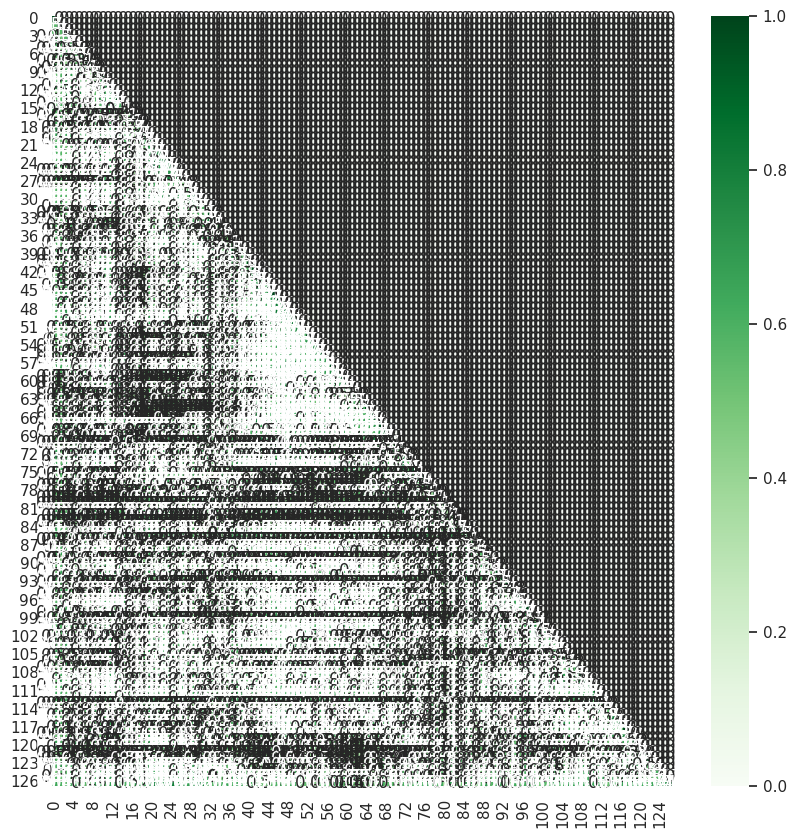

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(10, 10)})

sns.heatmap(sim, annot=True, cmap='Greens')

plt.show()